In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

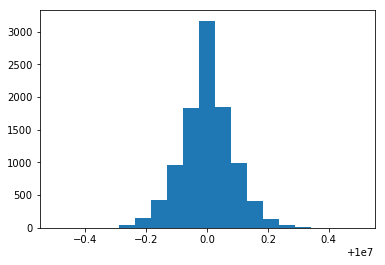

In [2]:
counter_error_dist = pd.read_csv('counter_error_distribution.csv')
plt.hist(np.float64(counter_error_dist), bins=np.linspace(10e6-0.5, 10e6+0.5, 20))
plt.show()

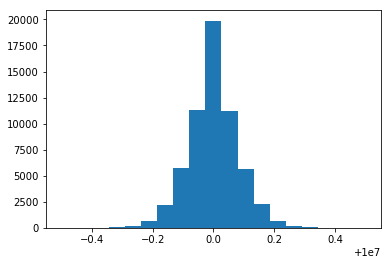

In [3]:
closed_loop_control_steady_state = pd.read_csv('closed_loop_control_steady_state.csv')
plt.hist(np.float64(closed_loop_control_steady_state['reported_frequency']), bins=np.linspace(10e6-0.5, 10e6+0.5, 20))
plt.show()

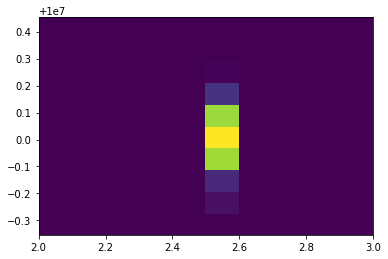

In [4]:
from numpy.polynomial.polynomial import polyfit
import matplotlib.patheffects as pe

x=np.float64(closed_loop_control_steady_state['ocxo_v_control'])
y=np.float64(closed_loop_control_steady_state['reported_frequency'])

plt.hist2d(x, y)
plt.show()

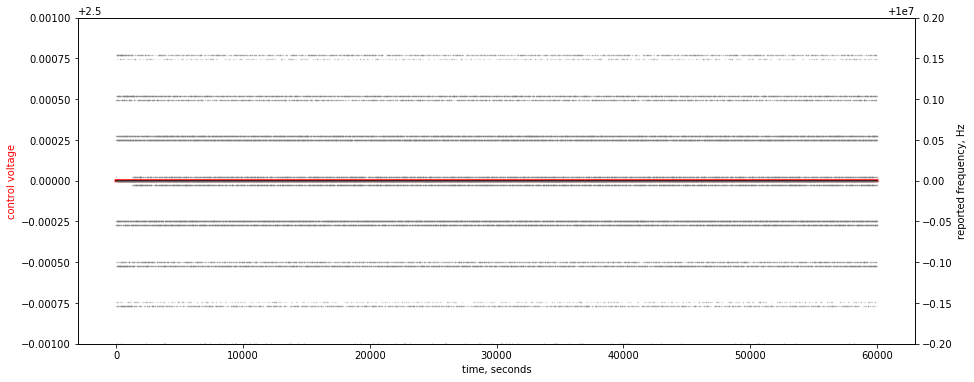

In [5]:
x = closed_loop_control_steady_state.index
y1 = closed_loop_control_steady_state['ocxo_v_control']
y2 = closed_loop_control_steady_state['reported_frequency']
y3 = closed_loop_control_steady_state['filtered_frequency']

fig, ax1 = plt.subplots(figsize=(15,6))

ax2 = ax1.twinx()
ax1.set(ylim=[2.499, 2.501])
ax1.plot(x, y1, '-', color='red', linewidth=3)
ax2.set(ylim=[10e6-0.2, 10e6+0.2])
ax2.plot(x, y2, '.', color='grey', markersize=1, alpha=0.25)
ax2.plot(x, y3, '-', color='black', linewidth=1, alpha=0.75)

ax1.set_xlabel('time, seconds')
ax1.set_ylabel('control voltage', color='r')
ax2.set_ylabel('reported frequency, Hz', color='k')

plt.show()


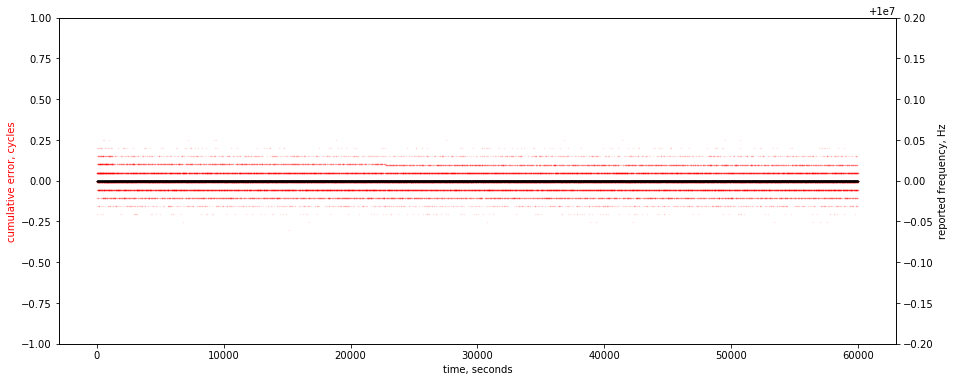

In [6]:
x = closed_loop_control_steady_state.index
y1 = closed_loop_control_steady_state['control_i_error']
y2 = closed_loop_control_steady_state['filtered_frequency']

fig, ax1 = plt.subplots(figsize=(15,6))

ax2 = ax1.twinx()
ax1.set(ylim=[-1, 1])
ax1.plot(x, y1, '.', color='red', alpha=0.1, markersize=1)
ax2.set(ylim=[10e6-0.2, 10e6+0.2])
ax2.plot(x, y2, '.', color='black', alpha=0.1, markersize=1)

ax1.set_xlabel('time, seconds')
ax1.set_ylabel('cumulative error, cycles', color='r')
ax2.set_ylabel('reported frequency, Hz', color='k')

plt.show()


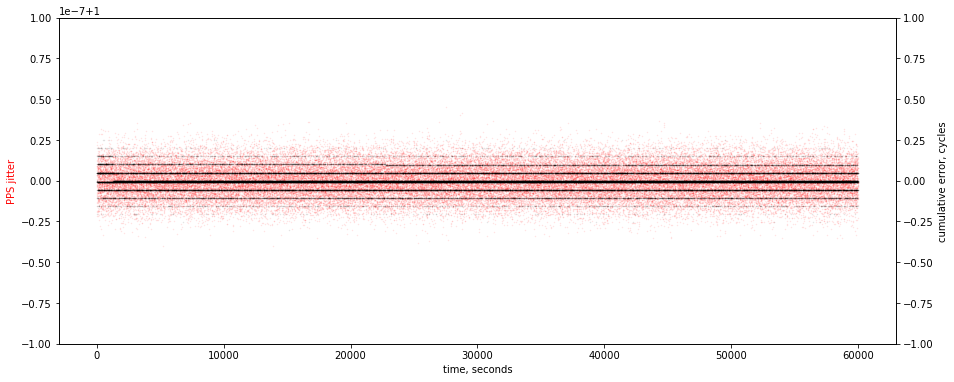

In [7]:
x = closed_loop_control_steady_state.index
y1 = closed_loop_control_steady_state['pps_seconds']
y2 = closed_loop_control_steady_state['control_i_error']

fig, ax1 = plt.subplots(figsize=(15,6))

ax2 = ax1.twinx()
ax1.set(ylim=[1-1e-7, 1+1e-7])
ax1.plot(x, y1, '.', color='red', alpha=0.1, markersize=1)
ax2.set(ylim=[-1, 1])
ax2.plot(x, y2, '.', color='black', alpha=0.1, markersize=1)

ax1.set_xlabel('time, seconds')
ax1.set_ylabel('PPS jitter', color='r')
ax2.set_ylabel('cumulative error, cycles', color='k')

plt.show()


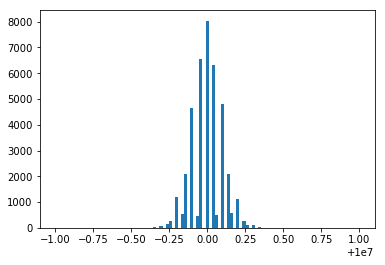

In [8]:
closed_loop_control_v_ref_step = pd.read_csv('closed_loop_control_v_ref_step.csv')
plt.hist(np.float64(closed_loop_control_v_ref_step['reported_frequency']), bins=np.linspace(10e6-1, 10e6+1, 100))
plt.show()

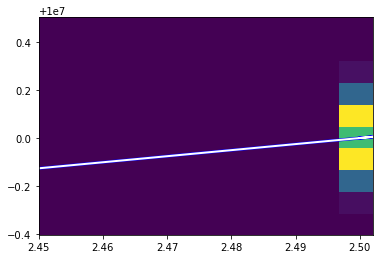

In [9]:
from numpy.polynomial.polynomial import polyfit
import matplotlib.patheffects as pe

x=np.float64(closed_loop_control_v_ref_step['ocxo_v_control'])
y=np.float64(closed_loop_control_v_ref_step['reported_frequency'])

b, m = polyfit(x, y, 1)

plt.hist2d(x, y)
plt.plot(x, b + m * x, path_effects=[pe.Stroke(linewidth=3, foreground='b'), pe.Stroke(linewidth=2, foreground='w')])
plt.show()

In [10]:
print(f"{m} Hz/V")

2.523563300296868 Hz/V


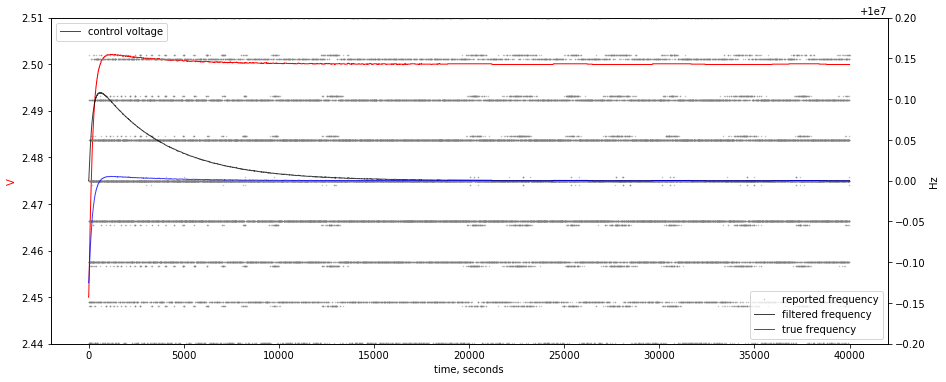

In [11]:
x = closed_loop_control_v_ref_step.index
y1 = closed_loop_control_v_ref_step['ocxo_v_control']
y2 = closed_loop_control_v_ref_step['reported_frequency']
y3 = closed_loop_control_v_ref_step['filtered_frequency']
y4 = closed_loop_control_v_ref_step['ocxo_frequency']

fig, ax1 = plt.subplots(figsize=(15,6))

ax2 = ax1.twinx()
ax1.set(ylim=[2.44, 2.51])
ax1.plot(x, y1, '-', color='red', linewidth=1, label='control voltage')
ax1.legend(loc='upper left')
ax2.set(ylim=[10e6-0.2, 10e6+0.2])
ax2.plot(x, y2, '.', color='grey', markersize=1, alpha=0.5, label='reported frequency')
ax2.plot(x, y3, '-', color='black', linewidth=1, alpha=0.75, label='filtered frequency')
ax2.plot(x, y4, '-', color='blue', linewidth=1, alpha=0.75, label='true frequency')
ax2.legend(loc='lower right')

ax1.set_xlabel('time, seconds')
ax1.set_ylabel('V', color='r')
ax2.set_ylabel('Hz', color='k')

plt.show()
